In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


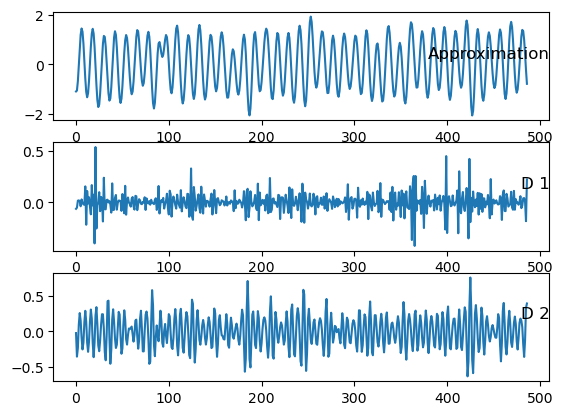

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('wavelet_coefficients_dmey.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1,2]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [3]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



In [4]:
# load dataset
dataset = read_csv('wavelet_coefficients_dmey.csv')
# dataset=dataset.drop(['D 2'], axis=1)


In [5]:
dataset

,Original Signal,Approximation,D 1,D 2
0,-0.08,-1.095587,-0.062365,-0.022621
1,0.39,-1.059707,-0.051469,-0.354581
2,0.86,-0.679144,0.016420,-0.234703
3,1.09,-0.054210,0.019016,0.096395
4,1.08,0.637204,0.011529,0.259440
...,...,...,...,...
482,0.38,1.337521,0.038560,-0.179849
483,0.77,0.987489,0.041474,-0.358503
484,0.80,0.417092,0.005378,-0.121987
485,0.77,-0.231688,-0.181613,0.331671


In [6]:
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed)
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[2,3,6]], axis=1, inplace=True)
# print(reframed.head())

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1     0.634956   0.242807   0.375240   0.477366  0.738938  0.251814  0.386661   
2     0.738938   0.251814   0.386661   0.053498  0.842920  0.347350  0.457817   
3     0.842920   0.347350   0.457817   0.144033  0.893805  0.504231  0.460537   
4     0.893805   0.504231   0.460537   0.621399  0.891593  0.677802  0.452690   
5     0.891593   0.677802   0.452690   0.874486  0.860619  0.817109  0.401022   
..         ...        ...        ...        ...       ...       ...       ...   
482   0.670354   0.865629   0.408283   0.567901  0.736726  0.853608  0.481023   
483   0.736726   0.853608   0.481023   0.236626  0.823009  0.765737  0.484076   
484   0.823009   0.765737   0.484076   0.047325  0.829646  0.622546  0.446243   
485   0.829646   0.622546   0.446243   0.329218  0.823009  0.459678  0.250254   
486   0.823009   0.459678   0.250254   0.952675  0.789823  0.320066  0.672320   

      var4(t)  
1    0.0534

In [7]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.634956,0.242807,0.375240,0.477366,0.738938,0.251814,0.386661,0.053498
2,0.738938,0.251814,0.386661,0.053498,0.842920,0.347350,0.457817,0.144033
3,0.842920,0.347350,0.457817,0.144033,0.893805,0.504231,0.460537,0.621399
4,0.893805,0.504231,0.460537,0.621399,0.891593,0.677802,0.452690,0.874486
5,0.891593,0.677802,0.452690,0.874486,0.860619,0.817109,0.401022,0.724280
...,...,...,...,...,...,...,...,...
482,0.670354,0.865629,0.408283,0.567901,0.736726,0.853608,0.481023,0.236626
483,0.736726,0.853608,0.481023,0.236626,0.823009,0.765737,0.484076,0.047325
484,0.823009,0.765737,0.484076,0.047325,0.829646,0.622546,0.446243,0.329218
485,0.829646,0.622546,0.446243,0.329218,0.823009,0.459678,0.250254,0.952675


In [8]:

# split into train and test sets
values = reframed.values
n_train_hours = 392
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(392, 1, 7) (392,) (94, 1, 7) (94,)


In [9]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/1000
6/6 - 2s - loss: 0.5023 - val_loss: 0.4613 - 2s/epoch - 392ms/step
Epoch 2/1000
6/6 - 0s - loss: 0.4223 - val_loss: 0.3900 - 39ms/epoch - 6ms/step
Epoch 3/1000
6/6 - 0s - loss: 0.3556 - val_loss: 0.3363 - 56ms/epoch - 9ms/step
Epoch 4/1000
6/6 - 0s - loss: 0.3045 - val_loss: 0.2991 - 34ms/epoch - 6ms/step
Epoch 5/1000
6/6 - 0s - loss: 0.2694 - val_loss: 0.2757 - 39ms/epoch - 7ms/step
Epoch 6/1000
6/6 - 0s - loss: 0.2482 - val_loss: 0.2620 - 32ms/epoch - 5ms/step
Epoch 7/1000
6/6 - 0s - loss: 0.2395 - val_loss: 0.2556 - 32ms/epoch - 5ms/step
Epoch 8/1000
6/6 - 0s - loss: 0.2362 - val_loss: 0.2536 - 42ms/epoch - 7ms/step
Epoch 9/1000
6/6 - 0s - loss: 0.2352 - val_loss: 0.2530 - 32ms/epoch - 5ms/step
Epoch 10/1000
6/6 - 0s - loss: 0.2345 - val_loss: 0.2519 - 33ms/epoch - 6ms/step
Epoch 11/1000
6/6 - 0s - loss: 0.2334 - val_loss: 0.2505 - 36ms/epoch - 6ms/step
Epoch 12/1000
6/6 - 0s - loss: 0.2323 - val_loss: 0.2492 - 34ms/epoch - 6ms/step
Epoch 13/1000
6/6 - 0s - loss: 0.2314

Epoch 103/1000
6/6 - 0s - loss: 0.2006 - val_loss: 0.1978 - 56ms/epoch - 9ms/step
Epoch 104/1000
6/6 - 0s - loss: 0.2004 - val_loss: 0.1974 - 40ms/epoch - 7ms/step
Epoch 105/1000
6/6 - 0s - loss: 0.2000 - val_loss: 0.1971 - 49ms/epoch - 8ms/step
Epoch 106/1000
6/6 - 0s - loss: 0.1995 - val_loss: 0.1962 - 40ms/epoch - 7ms/step
Epoch 107/1000
6/6 - 0s - loss: 0.1993 - val_loss: 0.1958 - 36ms/epoch - 6ms/step
Epoch 108/1000
6/6 - 0s - loss: 0.1988 - val_loss: 0.1955 - 36ms/epoch - 6ms/step
Epoch 109/1000
6/6 - 0s - loss: 0.1983 - val_loss: 0.1947 - 96ms/epoch - 16ms/step
Epoch 110/1000
6/6 - 0s - loss: 0.1980 - val_loss: 0.1943 - 34ms/epoch - 6ms/step
Epoch 111/1000
6/6 - 0s - loss: 0.1975 - val_loss: 0.1936 - 33ms/epoch - 6ms/step
Epoch 112/1000
6/6 - 0s - loss: 0.1971 - val_loss: 0.1932 - 32ms/epoch - 5ms/step
Epoch 113/1000
6/6 - 0s - loss: 0.1966 - val_loss: 0.1926 - 33ms/epoch - 6ms/step
Epoch 114/1000
6/6 - 0s - loss: 0.1961 - val_loss: 0.1921 - 43ms/epoch - 7ms/step
Epoch 115/1000


Epoch 203/1000
6/6 - 0s - loss: 0.1341 - val_loss: 0.1278 - 35ms/epoch - 6ms/step
Epoch 204/1000
6/6 - 0s - loss: 0.1343 - val_loss: 0.1279 - 38ms/epoch - 6ms/step
Epoch 205/1000
6/6 - 0s - loss: 0.1339 - val_loss: 0.1282 - 35ms/epoch - 6ms/step
Epoch 206/1000
6/6 - 0s - loss: 0.1339 - val_loss: 0.1276 - 36ms/epoch - 6ms/step
Epoch 207/1000
6/6 - 0s - loss: 0.1340 - val_loss: 0.1274 - 36ms/epoch - 6ms/step
Epoch 208/1000
6/6 - 0s - loss: 0.1338 - val_loss: 0.1276 - 37ms/epoch - 6ms/step
Epoch 209/1000
6/6 - 0s - loss: 0.1338 - val_loss: 0.1270 - 43ms/epoch - 7ms/step
Epoch 210/1000
6/6 - 0s - loss: 0.1339 - val_loss: 0.1272 - 37ms/epoch - 6ms/step
Epoch 211/1000
6/6 - 0s - loss: 0.1338 - val_loss: 0.1277 - 38ms/epoch - 6ms/step
Epoch 212/1000
6/6 - 0s - loss: 0.1347 - val_loss: 0.1270 - 35ms/epoch - 6ms/step
Epoch 213/1000
6/6 - 0s - loss: 0.1346 - val_loss: 0.1288 - 36ms/epoch - 6ms/step
Epoch 214/1000
6/6 - 0s - loss: 0.1347 - val_loss: 0.1266 - 37ms/epoch - 6ms/step
Epoch 215/1000
6

Epoch 303/1000
6/6 - 0s - loss: 0.1317 - val_loss: 0.1246 - 36ms/epoch - 6ms/step
Epoch 304/1000
6/6 - 0s - loss: 0.1317 - val_loss: 0.1260 - 35ms/epoch - 6ms/step
Epoch 305/1000
6/6 - 0s - loss: 0.1316 - val_loss: 0.1250 - 38ms/epoch - 6ms/step
Epoch 306/1000
6/6 - 0s - loss: 0.1315 - val_loss: 0.1261 - 35ms/epoch - 6ms/step
Epoch 307/1000
6/6 - 0s - loss: 0.1316 - val_loss: 0.1251 - 43ms/epoch - 7ms/step
Epoch 308/1000
6/6 - 0s - loss: 0.1315 - val_loss: 0.1267 - 33ms/epoch - 5ms/step
Epoch 309/1000
6/6 - 0s - loss: 0.1312 - val_loss: 0.1252 - 34ms/epoch - 6ms/step
Epoch 310/1000
6/6 - 0s - loss: 0.1319 - val_loss: 0.1254 - 35ms/epoch - 6ms/step
Epoch 311/1000
6/6 - 0s - loss: 0.1315 - val_loss: 0.1267 - 36ms/epoch - 6ms/step
Epoch 312/1000
6/6 - 0s - loss: 0.1317 - val_loss: 0.1248 - 37ms/epoch - 6ms/step
Epoch 313/1000
6/6 - 0s - loss: 0.1314 - val_loss: 0.1259 - 39ms/epoch - 6ms/step
Epoch 314/1000
6/6 - 0s - loss: 0.1312 - val_loss: 0.1251 - 47ms/epoch - 8ms/step
Epoch 315/1000
6

Epoch 403/1000
6/6 - 0s - loss: 0.1298 - val_loss: 0.1247 - 33ms/epoch - 6ms/step
Epoch 404/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1240 - 33ms/epoch - 5ms/step
Epoch 405/1000
6/6 - 0s - loss: 0.1298 - val_loss: 0.1249 - 35ms/epoch - 6ms/step
Epoch 406/1000
6/6 - 0s - loss: 0.1298 - val_loss: 0.1243 - 40ms/epoch - 7ms/step
Epoch 407/1000
6/6 - 0s - loss: 0.1297 - val_loss: 0.1249 - 39ms/epoch - 6ms/step
Epoch 408/1000
6/6 - 0s - loss: 0.1299 - val_loss: 0.1242 - 38ms/epoch - 6ms/step
Epoch 409/1000
6/6 - 0s - loss: 0.1297 - val_loss: 0.1252 - 36ms/epoch - 6ms/step
Epoch 410/1000
6/6 - 0s - loss: 0.1297 - val_loss: 0.1244 - 38ms/epoch - 6ms/step
Epoch 411/1000
6/6 - 0s - loss: 0.1296 - val_loss: 0.1250 - 37ms/epoch - 6ms/step
Epoch 412/1000
6/6 - 0s - loss: 0.1297 - val_loss: 0.1242 - 38ms/epoch - 6ms/step
Epoch 413/1000
6/6 - 0s - loss: 0.1296 - val_loss: 0.1247 - 37ms/epoch - 6ms/step
Epoch 414/1000
6/6 - 0s - loss: 0.1298 - val_loss: 0.1240 - 33ms/epoch - 6ms/step
Epoch 415/1000
6

Epoch 503/1000
6/6 - 0s - loss: 0.1283 - val_loss: 0.1237 - 42ms/epoch - 7ms/step
Epoch 504/1000
6/6 - 0s - loss: 0.1284 - val_loss: 0.1240 - 42ms/epoch - 7ms/step
Epoch 505/1000
6/6 - 0s - loss: 0.1283 - val_loss: 0.1242 - 39ms/epoch - 7ms/step
Epoch 506/1000
6/6 - 0s - loss: 0.1286 - val_loss: 0.1242 - 38ms/epoch - 6ms/step
Epoch 507/1000
6/6 - 0s - loss: 0.1283 - val_loss: 0.1251 - 37ms/epoch - 6ms/step
Epoch 508/1000
6/6 - 0s - loss: 0.1286 - val_loss: 0.1241 - 35ms/epoch - 6ms/step
Epoch 509/1000
6/6 - 0s - loss: 0.1281 - val_loss: 0.1246 - 38ms/epoch - 6ms/step
Epoch 510/1000
6/6 - 0s - loss: 0.1283 - val_loss: 0.1238 - 35ms/epoch - 6ms/step
Epoch 511/1000
6/6 - 0s - loss: 0.1281 - val_loss: 0.1241 - 37ms/epoch - 6ms/step
Epoch 512/1000
6/6 - 0s - loss: 0.1286 - val_loss: 0.1234 - 40ms/epoch - 7ms/step
Epoch 513/1000
6/6 - 0s - loss: 0.1282 - val_loss: 0.1239 - 39ms/epoch - 6ms/step
Epoch 514/1000
6/6 - 0s - loss: 0.1285 - val_loss: 0.1233 - 40ms/epoch - 7ms/step
Epoch 515/1000
6

Epoch 603/1000
6/6 - 0s - loss: 0.1275 - val_loss: 0.1232 - 39ms/epoch - 6ms/step
Epoch 604/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1237 - 37ms/epoch - 6ms/step
Epoch 605/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1231 - 39ms/epoch - 6ms/step
Epoch 606/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1231 - 39ms/epoch - 6ms/step
Epoch 607/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1226 - 36ms/epoch - 6ms/step
Epoch 608/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1228 - 36ms/epoch - 6ms/step
Epoch 609/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1229 - 37ms/epoch - 6ms/step
Epoch 610/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1231 - 35ms/epoch - 6ms/step
Epoch 611/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1229 - 35ms/epoch - 6ms/step
Epoch 612/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1230 - 36ms/epoch - 6ms/step
Epoch 613/1000
6/6 - 0s - loss: 0.1273 - val_loss: 0.1228 - 36ms/epoch - 6ms/step
Epoch 614/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1233 - 34ms/epoch - 6ms/step
Epoch 615/1000
6

Epoch 703/1000
6/6 - 0s - loss: 0.1264 - val_loss: 0.1222 - 35ms/epoch - 6ms/step
Epoch 704/1000
6/6 - 0s - loss: 0.1270 - val_loss: 0.1215 - 36ms/epoch - 6ms/step
Epoch 705/1000
6/6 - 0s - loss: 0.1266 - val_loss: 0.1222 - 35ms/epoch - 6ms/step
Epoch 706/1000
6/6 - 0s - loss: 0.1270 - val_loss: 0.1215 - 35ms/epoch - 6ms/step
Epoch 707/1000
6/6 - 0s - loss: 0.1266 - val_loss: 0.1226 - 34ms/epoch - 6ms/step
Epoch 708/1000
6/6 - 0s - loss: 0.1267 - val_loss: 0.1219 - 35ms/epoch - 6ms/step
Epoch 709/1000
6/6 - 0s - loss: 0.1264 - val_loss: 0.1227 - 40ms/epoch - 7ms/step
Epoch 710/1000
6/6 - 0s - loss: 0.1265 - val_loss: 0.1218 - 36ms/epoch - 6ms/step
Epoch 711/1000
6/6 - 0s - loss: 0.1263 - val_loss: 0.1224 - 37ms/epoch - 6ms/step
Epoch 712/1000
6/6 - 0s - loss: 0.1262 - val_loss: 0.1219 - 37ms/epoch - 6ms/step
Epoch 713/1000
6/6 - 0s - loss: 0.1262 - val_loss: 0.1218 - 39ms/epoch - 7ms/step
Epoch 714/1000
6/6 - 0s - loss: 0.1261 - val_loss: 0.1217 - 36ms/epoch - 6ms/step
Epoch 715/1000
6

Epoch 803/1000
6/6 - 0s - loss: 0.1251 - val_loss: 0.1208 - 36ms/epoch - 6ms/step
Epoch 804/1000
6/6 - 0s - loss: 0.1252 - val_loss: 0.1207 - 35ms/epoch - 6ms/step
Epoch 805/1000
6/6 - 0s - loss: 0.1252 - val_loss: 0.1206 - 35ms/epoch - 6ms/step
Epoch 806/1000
6/6 - 0s - loss: 0.1251 - val_loss: 0.1207 - 38ms/epoch - 6ms/step
Epoch 807/1000
6/6 - 0s - loss: 0.1252 - val_loss: 0.1209 - 35ms/epoch - 6ms/step
Epoch 808/1000
6/6 - 0s - loss: 0.1251 - val_loss: 0.1209 - 40ms/epoch - 7ms/step
Epoch 809/1000
6/6 - 0s - loss: 0.1251 - val_loss: 0.1208 - 37ms/epoch - 6ms/step
Epoch 810/1000
6/6 - 0s - loss: 0.1252 - val_loss: 0.1210 - 36ms/epoch - 6ms/step
Epoch 811/1000
6/6 - 0s - loss: 0.1250 - val_loss: 0.1210 - 36ms/epoch - 6ms/step
Epoch 812/1000
6/6 - 0s - loss: 0.1251 - val_loss: 0.1210 - 37ms/epoch - 6ms/step
Epoch 813/1000
6/6 - 0s - loss: 0.1249 - val_loss: 0.1208 - 34ms/epoch - 6ms/step
Epoch 814/1000
6/6 - 0s - loss: 0.1250 - val_loss: 0.1206 - 35ms/epoch - 6ms/step
Epoch 815/1000
6

Epoch 903/1000
6/6 - 0s - loss: 0.1241 - val_loss: 0.1202 - 35ms/epoch - 6ms/step
Epoch 904/1000
6/6 - 0s - loss: 0.1246 - val_loss: 0.1199 - 34ms/epoch - 6ms/step
Epoch 905/1000
6/6 - 0s - loss: 0.1245 - val_loss: 0.1200 - 37ms/epoch - 6ms/step
Epoch 906/1000
6/6 - 0s - loss: 0.1252 - val_loss: 0.1198 - 36ms/epoch - 6ms/step
Epoch 907/1000
6/6 - 0s - loss: 0.1245 - val_loss: 0.1195 - 34ms/epoch - 6ms/step
Epoch 908/1000
6/6 - 0s - loss: 0.1250 - val_loss: 0.1195 - 35ms/epoch - 6ms/step
Epoch 909/1000
6/6 - 0s - loss: 0.1245 - val_loss: 0.1195 - 36ms/epoch - 6ms/step
Epoch 910/1000
6/6 - 0s - loss: 0.1245 - val_loss: 0.1193 - 35ms/epoch - 6ms/step
Epoch 911/1000
6/6 - 0s - loss: 0.1243 - val_loss: 0.1194 - 34ms/epoch - 6ms/step
Epoch 912/1000
6/6 - 0s - loss: 0.1242 - val_loss: 0.1196 - 34ms/epoch - 6ms/step
Epoch 913/1000
6/6 - 0s - loss: 0.1241 - val_loss: 0.1197 - 35ms/epoch - 6ms/step
Epoch 914/1000
6/6 - 0s - loss: 0.1241 - val_loss: 0.1197 - 33ms/epoch - 6ms/step
Epoch 915/1000
6

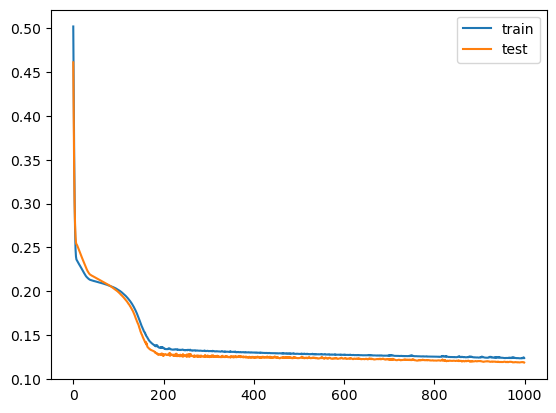

In [10]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [11]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

3/3 [==============================] - 0s 2ms/step
(94, 1)


In [12]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 1ms/step
(392, 1)


In [13]:
import pandas as pd
pd.DataFrame(train_y).to_csv('actualTrainLSTM .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainLSTM .csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestLSTM.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestLSTM.csv', index=False, header=False)

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [15]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': 0.031500574, 'MAE': 0.11854949, 'MSE': 0.02302831, 'RMSE': 0.15175082, 'NRMSE': 0.15175083, 'PBIAS': 6.2114654, 'RSR': 0.49873716, 'rSD': 1.3551128, 'NSE': -172.6226043701172, 'mNSE': -172.6226043701172, 'rNSE': -1864.5717462944585, 'd': 0.4284645915031433, 'md': 0.4284645915031433, 'rd': 0.4284645915031433, 'cp': 0.4284645915031433, 'r': 0.4284645915031433, 'R2': 0.7512612373425377}


In [16]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Design network
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/1000
6/6 - 2s - loss: 0.4086 - val_loss: 0.3526 - 2s/epoch - 346ms/step
Epoch 2/1000
6/6 - 0s - loss: 0.3106 - val_loss: 0.2932 - 33ms/epoch - 6ms/step
Epoch 3/1000
6/6 - 0s - loss: 0.2591 - val_loss: 0.2700 - 35ms/epoch - 6ms/step
Epoch 4/1000
6/6 - 0s - loss: 0.2462 - val_loss: 0.2641 - 34ms/epoch - 6ms/step
Epoch 5/1000
6/6 - 0s - loss: 0.2458 - val_loss: 0.2641 - 32ms/epoch - 5ms/step
Epoch 6/1000
6/6 - 0s - loss: 0.2446 - val_loss: 0.2606 - 33ms/epoch - 5ms/step
Epoch 7/1000
6/6 - 0s - loss: 0.2396 - val_loss: 0.2568 - 36ms/epoch - 6ms/step
Epoch 8/1000
6/6 - 0s - loss: 0.2373 - val_loss: 0.2557 - 34ms/epoch - 6ms/step
Epoch 9/1000
6/6 - 0s - loss: 0.2362 - val_loss: 0.2541 - 33ms/epoch - 6ms/step
Epoch 10/1000
6/6 - 0s - loss: 0.2348 - val_loss: 0.2513 - 34ms/epoch - 6ms/step
Epoch 11/1000
6/6 - 0s - loss: 0.2329 - val_loss: 0.2482 - 36ms/epoch - 6ms/step
Epoch 12/1000
6/6 - 0s - loss: 0.2310 - val_loss: 0.2454 - 33ms/epoch - 6ms/step
Epoch 13/1000
6/6 - 0s - loss: 0.2292

Epoch 103/1000
6/6 - 0s - loss: 0.1970 - val_loss: 0.1916 - 36ms/epoch - 6ms/step
Epoch 104/1000
6/6 - 0s - loss: 0.1965 - val_loss: 0.1907 - 41ms/epoch - 7ms/step
Epoch 105/1000
6/6 - 0s - loss: 0.1959 - val_loss: 0.1899 - 43ms/epoch - 7ms/step
Epoch 106/1000
6/6 - 0s - loss: 0.1954 - val_loss: 0.1892 - 42ms/epoch - 7ms/step
Epoch 107/1000
6/6 - 0s - loss: 0.1948 - val_loss: 0.1883 - 38ms/epoch - 6ms/step
Epoch 108/1000
6/6 - 0s - loss: 0.1943 - val_loss: 0.1876 - 37ms/epoch - 6ms/step
Epoch 109/1000
6/6 - 0s - loss: 0.1936 - val_loss: 0.1866 - 39ms/epoch - 7ms/step
Epoch 110/1000
6/6 - 0s - loss: 0.1930 - val_loss: 0.1859 - 33ms/epoch - 6ms/step
Epoch 111/1000
6/6 - 0s - loss: 0.1924 - val_loss: 0.1851 - 35ms/epoch - 6ms/step
Epoch 112/1000
6/6 - 0s - loss: 0.1916 - val_loss: 0.1842 - 35ms/epoch - 6ms/step
Epoch 113/1000
6/6 - 0s - loss: 0.1909 - val_loss: 0.1832 - 34ms/epoch - 6ms/step
Epoch 114/1000
6/6 - 0s - loss: 0.1901 - val_loss: 0.1820 - 33ms/epoch - 6ms/step
Epoch 115/1000
6

Epoch 203/1000
6/6 - 0s - loss: 0.1353 - val_loss: 0.1243 - 34ms/epoch - 6ms/step
Epoch 204/1000
6/6 - 0s - loss: 0.1350 - val_loss: 0.1255 - 34ms/epoch - 6ms/step
Epoch 205/1000
6/6 - 0s - loss: 0.1354 - val_loss: 0.1245 - 35ms/epoch - 6ms/step
Epoch 206/1000
6/6 - 0s - loss: 0.1356 - val_loss: 0.1271 - 36ms/epoch - 6ms/step
Epoch 207/1000
6/6 - 0s - loss: 0.1350 - val_loss: 0.1249 - 34ms/epoch - 6ms/step
Epoch 208/1000
6/6 - 0s - loss: 0.1356 - val_loss: 0.1278 - 34ms/epoch - 6ms/step
Epoch 209/1000
6/6 - 0s - loss: 0.1351 - val_loss: 0.1247 - 35ms/epoch - 6ms/step
Epoch 210/1000
6/6 - 0s - loss: 0.1353 - val_loss: 0.1269 - 35ms/epoch - 6ms/step
Epoch 211/1000
6/6 - 0s - loss: 0.1341 - val_loss: 0.1242 - 34ms/epoch - 6ms/step
Epoch 212/1000
6/6 - 0s - loss: 0.1343 - val_loss: 0.1248 - 33ms/epoch - 6ms/step
Epoch 213/1000
6/6 - 0s - loss: 0.1336 - val_loss: 0.1247 - 34ms/epoch - 6ms/step
Epoch 214/1000
6/6 - 0s - loss: 0.1339 - val_loss: 0.1250 - 36ms/epoch - 6ms/step
Epoch 215/1000
6

Epoch 303/1000
6/6 - 0s - loss: 0.1324 - val_loss: 0.1247 - 37ms/epoch - 6ms/step
Epoch 304/1000
6/6 - 0s - loss: 0.1321 - val_loss: 0.1235 - 35ms/epoch - 6ms/step
Epoch 305/1000
6/6 - 0s - loss: 0.1324 - val_loss: 0.1251 - 35ms/epoch - 6ms/step
Epoch 306/1000
6/6 - 0s - loss: 0.1323 - val_loss: 0.1233 - 32ms/epoch - 5ms/step
Epoch 307/1000
6/6 - 0s - loss: 0.1325 - val_loss: 0.1248 - 33ms/epoch - 6ms/step
Epoch 308/1000
6/6 - 0s - loss: 0.1323 - val_loss: 0.1227 - 34ms/epoch - 6ms/step
Epoch 309/1000
6/6 - 0s - loss: 0.1324 - val_loss: 0.1241 - 33ms/epoch - 5ms/step
Epoch 310/1000
6/6 - 0s - loss: 0.1319 - val_loss: 0.1232 - 35ms/epoch - 6ms/step
Epoch 311/1000
6/6 - 0s - loss: 0.1321 - val_loss: 0.1234 - 35ms/epoch - 6ms/step
Epoch 312/1000
6/6 - 0s - loss: 0.1320 - val_loss: 0.1239 - 33ms/epoch - 5ms/step
Epoch 313/1000
6/6 - 0s - loss: 0.1319 - val_loss: 0.1235 - 34ms/epoch - 6ms/step
Epoch 314/1000
6/6 - 0s - loss: 0.1320 - val_loss: 0.1231 - 37ms/epoch - 6ms/step
Epoch 315/1000
6

Epoch 403/1000
6/6 - 0s - loss: 0.1312 - val_loss: 0.1245 - 36ms/epoch - 6ms/step
Epoch 404/1000
6/6 - 0s - loss: 0.1308 - val_loss: 0.1229 - 37ms/epoch - 6ms/step
Epoch 405/1000
6/6 - 0s - loss: 0.1310 - val_loss: 0.1239 - 35ms/epoch - 6ms/step
Epoch 406/1000
6/6 - 0s - loss: 0.1310 - val_loss: 0.1225 - 36ms/epoch - 6ms/step
Epoch 407/1000
6/6 - 0s - loss: 0.1311 - val_loss: 0.1238 - 33ms/epoch - 6ms/step
Epoch 408/1000
6/6 - 0s - loss: 0.1307 - val_loss: 0.1228 - 34ms/epoch - 6ms/step
Epoch 409/1000
6/6 - 0s - loss: 0.1308 - val_loss: 0.1238 - 34ms/epoch - 6ms/step
Epoch 410/1000
6/6 - 0s - loss: 0.1306 - val_loss: 0.1227 - 34ms/epoch - 6ms/step
Epoch 411/1000
6/6 - 0s - loss: 0.1308 - val_loss: 0.1228 - 38ms/epoch - 6ms/step
Epoch 412/1000
6/6 - 0s - loss: 0.1308 - val_loss: 0.1223 - 34ms/epoch - 6ms/step
Epoch 413/1000
6/6 - 0s - loss: 0.1309 - val_loss: 0.1223 - 34ms/epoch - 6ms/step
Epoch 414/1000
6/6 - 0s - loss: 0.1308 - val_loss: 0.1226 - 35ms/epoch - 6ms/step
Epoch 415/1000
6

Epoch 503/1000
6/6 - 0s - loss: 0.1301 - val_loss: 0.1224 - 36ms/epoch - 6ms/step
Epoch 504/1000
6/6 - 0s - loss: 0.1299 - val_loss: 0.1232 - 38ms/epoch - 6ms/step
Epoch 505/1000
6/6 - 0s - loss: 0.1303 - val_loss: 0.1232 - 39ms/epoch - 7ms/step
Epoch 506/1000
6/6 - 0s - loss: 0.1301 - val_loss: 0.1237 - 41ms/epoch - 7ms/step
Epoch 507/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1231 - 37ms/epoch - 6ms/step
Epoch 508/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1230 - 32ms/epoch - 5ms/step
Epoch 509/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1225 - 34ms/epoch - 6ms/step
Epoch 510/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1229 - 37ms/epoch - 6ms/step
Epoch 511/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1226 - 37ms/epoch - 6ms/step
Epoch 512/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1231 - 37ms/epoch - 6ms/step
Epoch 513/1000
6/6 - 0s - loss: 0.1300 - val_loss: 0.1228 - 36ms/epoch - 6ms/step
Epoch 514/1000
6/6 - 0s - loss: 0.1299 - val_loss: 0.1230 - 36ms/epoch - 6ms/step
Epoch 515/1000
6

Epoch 603/1000
6/6 - 0s - loss: 0.1291 - val_loss: 0.1218 - 36ms/epoch - 6ms/step
Epoch 604/1000
6/6 - 0s - loss: 0.1290 - val_loss: 0.1221 - 36ms/epoch - 6ms/step
Epoch 605/1000
6/6 - 0s - loss: 0.1291 - val_loss: 0.1222 - 37ms/epoch - 6ms/step
Epoch 606/1000
6/6 - 0s - loss: 0.1292 - val_loss: 0.1224 - 38ms/epoch - 6ms/step
Epoch 607/1000
6/6 - 0s - loss: 0.1296 - val_loss: 0.1230 - 38ms/epoch - 6ms/step
Epoch 608/1000
6/6 - 0s - loss: 0.1293 - val_loss: 0.1231 - 39ms/epoch - 7ms/step
Epoch 609/1000
6/6 - 0s - loss: 0.1290 - val_loss: 0.1226 - 39ms/epoch - 7ms/step
Epoch 610/1000
6/6 - 0s - loss: 0.1291 - val_loss: 0.1225 - 40ms/epoch - 7ms/step
Epoch 611/1000
6/6 - 0s - loss: 0.1289 - val_loss: 0.1220 - 35ms/epoch - 6ms/step
Epoch 612/1000
6/6 - 0s - loss: 0.1289 - val_loss: 0.1221 - 37ms/epoch - 6ms/step
Epoch 613/1000
6/6 - 0s - loss: 0.1288 - val_loss: 0.1224 - 38ms/epoch - 6ms/step
Epoch 614/1000
6/6 - 0s - loss: 0.1288 - val_loss: 0.1224 - 37ms/epoch - 6ms/step
Epoch 615/1000
6

Epoch 703/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1223 - 35ms/epoch - 6ms/step
Epoch 704/1000
6/6 - 0s - loss: 0.1279 - val_loss: 0.1220 - 34ms/epoch - 6ms/step
Epoch 705/1000
6/6 - 0s - loss: 0.1279 - val_loss: 0.1219 - 47ms/epoch - 8ms/step
Epoch 706/1000
6/6 - 0s - loss: 0.1279 - val_loss: 0.1222 - 34ms/epoch - 6ms/step
Epoch 707/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1223 - 32ms/epoch - 5ms/step
Epoch 708/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1222 - 31ms/epoch - 5ms/step
Epoch 709/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1221 - 32ms/epoch - 5ms/step
Epoch 710/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1223 - 36ms/epoch - 6ms/step
Epoch 711/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1221 - 34ms/epoch - 6ms/step
Epoch 712/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1220 - 34ms/epoch - 6ms/step
Epoch 713/1000
6/6 - 0s - loss: 0.1278 - val_loss: 0.1219 - 36ms/epoch - 6ms/step
Epoch 714/1000
6/6 - 0s - loss: 0.1277 - val_loss: 0.1220 - 36ms/epoch - 6ms/step
Epoch 715/1000
6

Epoch 803/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1208 - 34ms/epoch - 6ms/step
Epoch 804/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1207 - 34ms/epoch - 6ms/step
Epoch 805/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1212 - 35ms/epoch - 6ms/step
Epoch 806/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1208 - 36ms/epoch - 6ms/step
Epoch 807/1000
6/6 - 0s - loss: 0.1272 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 808/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1205 - 37ms/epoch - 6ms/step
Epoch 809/1000
6/6 - 0s - loss: 0.1270 - val_loss: 0.1206 - 40ms/epoch - 7ms/step
Epoch 810/1000
6/6 - 0s - loss: 0.1271 - val_loss: 0.1204 - 37ms/epoch - 6ms/step
Epoch 811/1000
6/6 - 0s - loss: 0.1267 - val_loss: 0.1204 - 37ms/epoch - 6ms/step
Epoch 812/1000
6/6 - 0s - loss: 0.1268 - val_loss: 0.1200 - 37ms/epoch - 6ms/step
Epoch 813/1000
6/6 - 0s - loss: 0.1269 - val_loss: 0.1199 - 37ms/epoch - 6ms/step
Epoch 814/1000
6/6 - 0s - loss: 0.1269 - val_loss: 0.1200 - 36ms/epoch - 6ms/step
Epoch 815/1000
6

Epoch 903/1000
6/6 - 0s - loss: 0.1260 - val_loss: 0.1195 - 40ms/epoch - 7ms/step
Epoch 904/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1192 - 40ms/epoch - 7ms/step
Epoch 905/1000
6/6 - 0s - loss: 0.1259 - val_loss: 0.1189 - 39ms/epoch - 7ms/step
Epoch 906/1000
6/6 - 0s - loss: 0.1258 - val_loss: 0.1187 - 43ms/epoch - 7ms/step
Epoch 907/1000
6/6 - 0s - loss: 0.1260 - val_loss: 0.1188 - 44ms/epoch - 7ms/step
Epoch 908/1000
6/6 - 0s - loss: 0.1258 - val_loss: 0.1192 - 40ms/epoch - 7ms/step
Epoch 909/1000
6/6 - 0s - loss: 0.1256 - val_loss: 0.1193 - 36ms/epoch - 6ms/step
Epoch 910/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1193 - 33ms/epoch - 6ms/step
Epoch 911/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1190 - 33ms/epoch - 6ms/step
Epoch 912/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1190 - 36ms/epoch - 6ms/step
Epoch 913/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1191 - 35ms/epoch - 6ms/step
Epoch 914/1000
6/6 - 0s - loss: 0.1257 - val_loss: 0.1192 - 34ms/epoch - 6ms/step
Epoch 915/1000
6

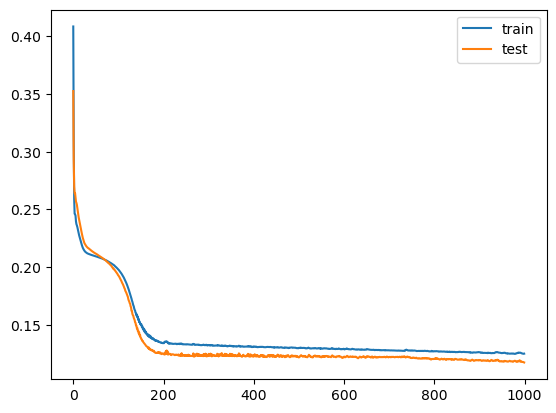

In [17]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

3/3 [==============================] - 0s 2ms/step
(94, 1)


In [19]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 1ms/step
(392, 1)


In [20]:
pd.DataFrame(train_y).to_csv('actualTrainGRU .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainGRU.csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestGRU.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestGRU.csv', index=False, header=False)

In [21]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': 0.021890188, 'MAE': 0.117387995, 'MSE': 0.022788685, 'RMSE': 0.15095921, 'NRMSE': 0.15095922, 'PBIAS': 4.316433, 'RSR': 0.4961355, 'rSD': 1.3674203, 'NSE': -175.25132751464844, 'mNSE': -175.25132751464844, 'rNSE': -1892.9657270364835, 'd': 0.42814916372299194, 'md': 0.42814916372299194, 'rd': 0.42814916372299194, 'cp': 0.42814916372299194, 'r': 0.42814916372299194, 'R2': 0.7538495228709126}
